In [105]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
def unit_activation(W, X):
    return (np.transpose(W).dot(X) >= 0)


def count_misclassifications(S_0, S_1, W):
    misclass = 0
    for vector in S_0:
        misclass += (unit_activation(W, vector) == 1)
    for vector in S_1:
        misclass += (unit_activation(W, vector) == 0)
    return int(misclass)


def PTA(eta, W_train_init):
    W_train = W_train_init
    epoch = 0
    misclassifications = []
    while (1):
        misclassifications.append(count_misclassifications(S_0, S_1, W_train))
        if (misclassifications[-1] == 0):
            break
        for vector in S_1:
            W_train = W_train + eta * vector * \
                (1 - unit_activation(W_train, vector))
        for vector in S_0:
            W_train = W_train + eta * vector * \
                (0 - unit_activation(W_train, vector))
        epoch += 1

    return W_train, epoch, misclassifications

In [107]:
def assign2_experiment(n):
    w_0 = np.random.uniform(-0.25, 0.25)
    W = np.random.uniform(-1, 1, size=(2, 1))
    W = np.insert(W, 0, w_0, axis=0)

    S = []
    for i in range(0, n):
        X = np.random.uniform(-1, 1, size=(2, 1))
        X = np.insert(X, 0, 1, axis=0)
        S.append(X)

    S_1 = []
    S_0 = []
    for vector in S:
        local_field = np.transpose(W).dot(vector)
        if (local_field >= 0):
            S_1.append(vector)
        else:
            S_0.append(vector)

    plt.title('Plots of Boundary and points (x1, x2) from classes 1 and 0')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.plot([x[1] for x in S_1], [x[2] for x in S_1], 'x', label='Class 1')
    plt.plot([x[1] for x in S_0], [x[2] for x in S_0], 'o', label='Class 0')

    x_1 = np.linspace(-1, 1)
    x_2 = (-W[0] - W[1]*x_1)/W[2]
    plt.plot(x_1, x_2, 'r', label='Boundary')
    plt.legend(title='Legend', bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.show()
    
    print('----------------------------------------------------------------')

    W_train_init = np.random.uniform(-1, 1, size=(3, 1))

    for eta in [1, 10, 0.1]:
        W_train_comp, epoch, misclassifications = PTA(eta, W_train_init)
        print('Model training completed with eta({}), n({}) in {} epochs'.format(
            eta, n, epoch))
        print('Initial W_train:', W_train_init)
        print('Trained W_train:', W_train_comp)
        print('Optimal W:', W)

        plt.title(
            'Plot for Epoch vs Misclassifications with eta({}) and n({})'.format(eta, n))
        plt.xlabel('Epoch number')
        plt.ylabel('Misclassifications')
        plt.plot([i for i in range(0, epoch + 1)], misclassifications,
                 'r', label='epoch vs misclassifications')
        plt.legend(title='Legend', bbox_to_anchor=(1.0, 1.0), loc='upper left')
        plt.show()
        print('----------------------------------------------------------------')


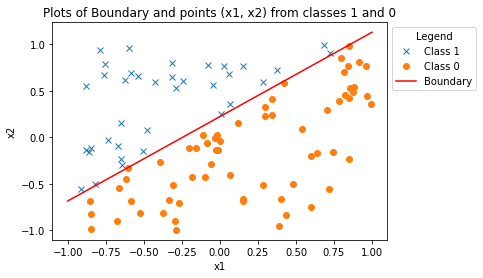

----------------------------------------------------------------
Model training completed with eta(1), n(100) in 118 epochs
Initial W_train: [[0.45419535]
 [0.28852031]
 [0.82173909]]
Trained W_train: [[-3.54580465]
 [-7.93046409]
 [ 6.5751501 ]]
Optimal W: [[-0.09522552]
 [-0.38849848]
 [ 0.42754113]]


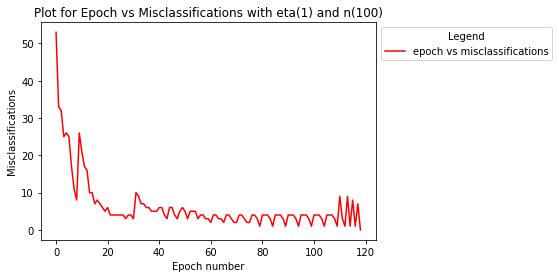

----------------------------------------------------------------
Model training completed with eta(10), n(100) in 75 epochs
Initial W_train: [[0.45419535]
 [0.28852031]
 [0.82173909]]
Trained W_train: [[-29.54580465]
 [-66.25421031]
 [ 53.45815409]]
Optimal W: [[-0.09522552]
 [-0.38849848]
 [ 0.42754113]]


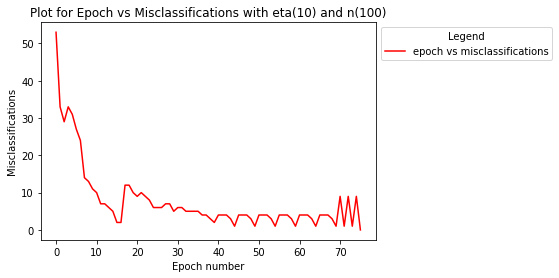

----------------------------------------------------------------
Model training completed with eta(0.1), n(100) in 94 epochs
Initial W_train: [[0.45419535]
 [0.28852031]
 [0.82173909]]
Trained W_train: [[-0.34580465]
 [-0.77228039]
 [ 0.63792425]]
Optimal W: [[-0.09522552]
 [-0.38849848]
 [ 0.42754113]]


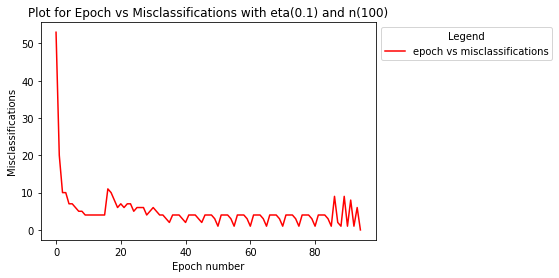

----------------------------------------------------------------


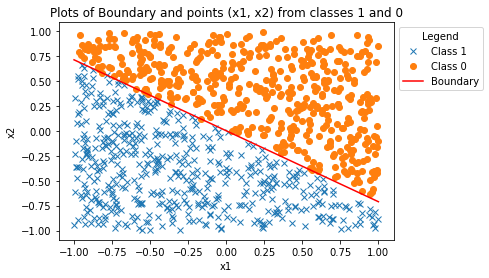

----------------------------------------------------------------
Model training completed with eta(1), n(1000) in 122 epochs
Initial W_train: [[ 0.41108416]
 [-0.00195778]
 [-0.64931392]]
Trained W_train: [[-3.58891584]
 [-7.97764627]
 [ 6.52821736]]
Optimal W: [[ 0.00223031]
 [-0.69180175]
 [-0.97065251]]


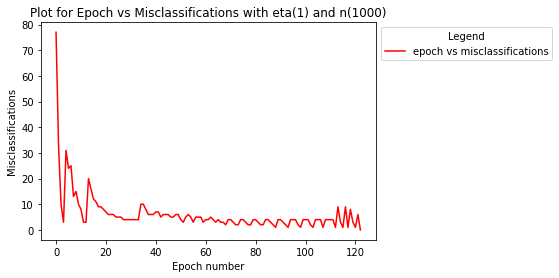

----------------------------------------------------------------
Model training completed with eta(10), n(1000) in 62 epochs
Initial W_train: [[ 0.41108416]
 [-0.00195778]
 [-0.64931392]]
Trained W_train: [[-29.58891584]
 [-67.47376579]
 [ 54.53292158]]
Optimal W: [[ 0.00223031]
 [-0.69180175]
 [-0.97065251]]


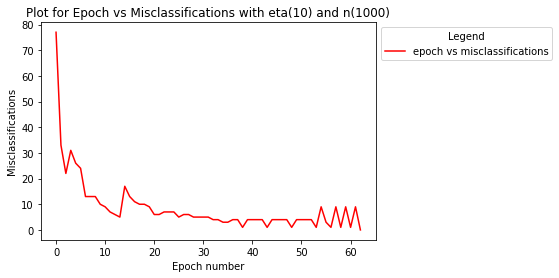

----------------------------------------------------------------
Model training completed with eta(0.1), n(1000) in 46 epochs
Initial W_train: [[ 0.41108416]
 [-0.00195778]
 [-0.64931392]]
Trained W_train: [[-0.28891584]
 [-0.64780513]
 [ 0.52855839]]
Optimal W: [[ 0.00223031]
 [-0.69180175]
 [-0.97065251]]


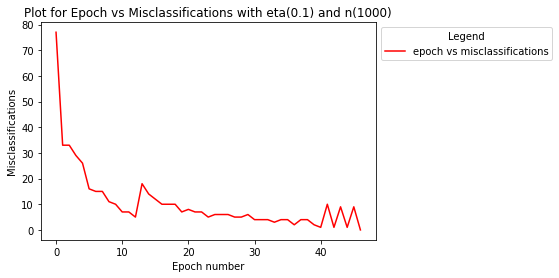

----------------------------------------------------------------


In [108]:
assign2_experiment(n=100)
assign2_experiment(n=1000)